In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%matplotlib inline
import sys, os, time
import itertools
import math, random
import glob
import tensorflow as tf
import numpy as np
import cv2
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from IPython.display import Image, display
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# pip uninstall celery
# pip install celery==3.1.24

In [ ]:
# Basic parameters
max_epochs = 25
base_image_path = "/content/drive/My Drive/Colab Notebooks/part3/5_tensorflow_traffic_light_images/"
image_types = ["red", "green", "yellow"]
input_img_x = 32
input_img_y = 32
train_test_split_ratio = 0.9
batch_size = 32
checkpoint_name = "/content/drive/My Drive/Colab Notebooks/part3/"
# Helper layer functions
def weight_variable(shape):
   initial = tf.truncated_normal(shape, stddev=0.1)
   return tf.Variable(initial)
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)
def conv2d(x, W, stride):
    return tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding='SAME')
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                       strides=[1, 2, 2, 1], padding='SAME')
#=====================================================
# Model
x = tf.placeholder(tf.float32, shape=[None, input_img_x, input_img_y, 3])
y_ = tf.placeholder(tf.float32, shape=[None, len(image_types)])
# Model - THIS PART SHOULD BE SAVED SEPARATELY IN "model.txt" file, SO IT CAN BE RETRIEVED AUTOMATI
x_image = x

#=====================================================
# Our first three convolutional layers, of 16 3x3 filters
W_conv1 = weight_variable([3, 3, 3, 16])
b_conv1 = bias_variable([16])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1, 1) + b_conv1)
# Our pooling layer
h_pool4 = max_pool_2x2(h_conv1)
n1, n2, n3, n4 = h_pool4.get_shape().as_list()
W_fc1 = weight_variable([n2*n3*n4, 3])
b_fc1 = bias_variable([3])
# We flatten our pool layer into a fully connected layer
h_pool4_flat = tf.reshape(h_pool4, [-1, n2*n3*n4])
y = tf.matmul(h_pool4_flat, W_fc1) + b_fc1
saver = tf.train.Saver({'W_conv1' : W_conv1, 'b_conv1' : b_conv1, 'W_fc1' : W_fc1, 'b_fc1' : b_fc1})




In [ ]:
sess = tf.InteractiveSession() # Our loss function and optimizer

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits = y))
train_step = tf.train.AdamOptimizer(1e-4, 0.9).minimize(loss)
# adam을 다른 것으로 바꾸면 보고서에 쓸 거리가 생긴다

sess.run(tf.initialize_all_variables())

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [ ]:
# ! ls /content/drive/My\ Drive/Colab\ Notebooks/part3/
# ! ls /content/drive/My\ Drive/Colab\ Notebooks/part3/

In [ ]:
# base_image_path = '/content/drive/My\ Drive/Colab\ Notebooks/part3/5_tensorflow_traffic_light_images/'

In [ ]:
v_loss = least_loss = 99999999
# 위에 일부러 엄청 큰 수로

# Load data
full_set = []
for im_type in image_types:
    print('im_type:', im_type)
    for ex in glob.glob(os.path.join(base_image_path, im_type, "*")):
        # print(1)
        print(ex)
        im = cv2.imread(ex)
# open cv로 뜨면 된다. 
# 아마 상이즈가 제각기이다. 따라서 32x32의 이미지로 바꿈
# one_hot encoding은 세개로 설정하는 부분
        if not im is None:
            im = cv2.resize(im, (32, 32))
            # Create an array representing our classes and set it
            one_hot_array = [0] * len(image_types)
            one_hot_array[image_types.index(im_type)] = 1
            assert(im.shape == (32, 32, 3))
            full_set.append((im, one_hot_array, ex))
random.shuffle(full_set)
# 셔플해서 섞는다

im_type: red
/content/drive/My Drive/Colab Notebooks/part3/5_tensorflow_traffic_light_images/red/0230d0a6-0eac-4bf1-bc0c-560f18ad7415.jpg
/content/drive/My Drive/Colab Notebooks/part3/5_tensorflow_traffic_light_images/red/025e999e-e9c9-49a6-b9a5-4ced52b73c64.jpg
/content/drive/My Drive/Colab Notebooks/part3/5_tensorflow_traffic_light_images/red/0166f90e-c685-4f0b-98ed-0c3fd338ff01.jpg
/content/drive/My Drive/Colab Notebooks/part3/5_tensorflow_traffic_light_images/red/0023f366-a173-4ba7-952c-63f5698c022d.jpg
/content/drive/My Drive/Colab Notebooks/part3/5_tensorflow_traffic_light_images/red/01d76b8c-dc66-47b6-83d4-b00826dfec18.jpg
/content/drive/My Drive/Colab Notebooks/part3/5_tensorflow_traffic_light_images/red/00601e2b-af06-4b91-a50b-d94385371b01.jpg
/content/drive/My Drive/Colab Notebooks/part3/5_tensorflow_traffic_light_images/red/022ae068-6f6e-4563-97c1-f96261b436e6.jpg
/content/drive/My Drive/Colab Notebooks/part3/5_tensorflow_traffic_light_images/red/026e3566-6f8a-41be-9f41-dd87

In [ ]:
# We split our data into a training and test set here
split_index = int(math.floor(len(full_set) * train_test_split_ratio))
train_set = full_set[:split_index]
test_set = full_set[split_index:]

# We ensure that our training and test sets are a multiple of batch size
train_set_offset = len(train_set) % batch_size
test_set_offset = len(test_set) % batch_size
train_set = train_set[: len(train_set) - train_set_offset]
test_set = test_set[: len(test_set) - test_set_offset]

train_x, train_y, train_z = zip(*train_set)
test_x, test_y, test_z = zip(*test_set) 

print("Starting training... [{} training examples]".format(len(train_x)))
v_loss = least_loss = 99999999
train_loss = []
val_loss = []

for i in range(0, max_epochs):
       # Iterate over our training set
   for tt in range(0, (len(train_x) // batch_size)):
       start_batch = batch_size * tt
       end_batch = batch_size * (tt + 1)
       train_step.run(feed_dict={x: train_x[start_batch:end_batch],y_: train_y[start_batch:end_batch]})
       ex_seen = "Current epoch, examples seen: {:20} / {} \r".format(tt * batch_size, len(train_x))
       sys.stdout.write(ex_seen.format(tt * batch_size))
       sys.stdout.flush()
   
   ex_seen = "Current epoch, examples seen: {:20} / {} \r".format((tt + 1) * batch_size, len(train_x))
   
   sys.stdout.write(ex_seen.format(tt * batch_size))
   sys.stdout.flush()

   t_loss = loss.eval(feed_dict={x: train_x, y_: train_y})
   v_loss = loss.eval(feed_dict={x: test_x, y_: test_y})
   
   train_loss.append(t_loss)
   val_loss.append(v_loss)
   
   sys.stdout.write("Epoch {:5}: loss: {:15.10f},val. loss: {:15.10f}".format(i + 1, t_loss, v_loss))

   if v_loss < least_loss:
       sys.stdout.write(", saving new best model to {}".format(checkpoint_name))
       least_loss = v_loss
       filename = saver.save(sess, checkpoint_name)
   sys.stdout.write("\n")


Starting training... [1312 training examples]
Epoch     1: loss:   36.8055038452,val. loss:   46.6990585327, saving new best model to /content/drive/My Drive/Colab Notebooks/part3/
Epoch     2: loss:   20.6700077057,val. loss:   26.6713371277, saving new best model to /content/drive/My Drive/Colab Notebooks/part3/
Epoch     3: loss:   11.6491956711,val. loss:   16.4921112061, saving new best model to /content/drive/My Drive/Colab Notebooks/part3/
Epoch     4: loss:    6.7297444344,val. loss:   10.7673702240, saving new best model to /content/drive/My Drive/Colab Notebooks/part3/
Epoch     5: loss:    4.0175991058,val. loss:    7.2886867523, saving new best model to /content/drive/My Drive/Colab Notebooks/part3/
Epoch     6: loss:    2.7342164516,val. loss:    5.3895673752, saving new best model to /content/drive/My Drive/Colab Notebooks/part3/
Epoch     7: loss:    1.8889037371,val. loss:    3.8681316376, saving new best model to /content/drive/My Drive/Colab Notebooks/part3/
Epoch    

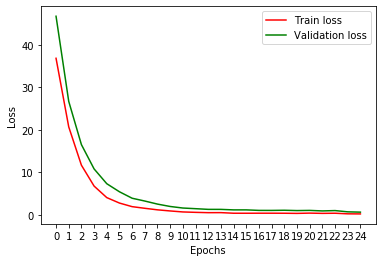

In [ ]:
plt.figure()
plt.xticks(np.arange(0, len(train_loss), 1.0))
plt.ylabel("Loss")
plt.xlabel("Epochs")
train_line = plt.plot(range(0, len(train_loss)), train_loss, 'r', label="Train loss")
val_line = plt.plot(range(0, len(val_loss)), val_loss, 'g', label="Validation loss")
plt.legend()
plt.show()


모델 만들었을 때 틀린 그림
틀린 예시 보여주는 코드
그리고 아래 confusion matrix는 색깔이 진하면 좋은 것

-> 실제 초록색 사진인데 내 모델이 레드로 예측한게 이정도이다라는 소리

-> 수요일에 또 실습있으닌깐 그때해라

Actual: green, predicted: red


Actual: red, predicted: green


Actual: red, predicted: green


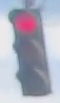

Actual: green, predicted: yellow


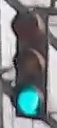

In [ ]:
zipped_x_y = list(zip(test_x, test_y))
conf_true = []
conf_pred = []
for tt in range(0, len(zipped_x_y)):
   q = zipped_x_y[tt]
   sfmax = list(sess.run(tf.nn.softmax(y.eval(feed_dict={x: [q[0]]})))[0])
   sf_ind = sfmax.index(max(sfmax))
   
   predicted_label = image_types[sf_ind]
   actual_label = image_types[q[1].index(max(q[1]))]
   
   conf_true.append(actual_label)
   conf_pred.append(predicted_label)
   
   if predicted_label != actual_label:
       print("Actual: {}, predicted: {}".format(actual_label, predicted_label))
       img_path = test_z[tt]    
       ex_img = Image(filename=img_path)
       display(ex_img)

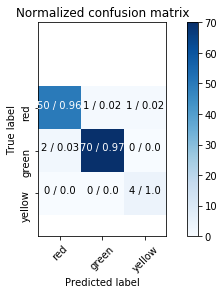

In [ ]:
# From sklearn docs
def plot_confusion_matrix(cm, classes,
                         normalize=False,
title='Confusion matrix',
cmap=plt.cm.Blues):
   """
   This function prints and plots the confusion matrix.
   Normalization can be applied by setting `normalize=True`.
   """
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes, rotation='vertical')
   plt.ylim(3, -2)
   cm2 = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
   cm2 = np.around(cm2, 2)
   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
       plt.text(j, i, str(cm[i, j]) + " / " + str(cm2[i, j]), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
   plt.tight_layout()
   plt.ylabel('True label', rotation='vertical')
   plt.xlabel('Predicted label')
cnf_matrix = confusion_matrix(conf_true, conf_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=image_types, normalize=False,title='Normalized confusion matrix')
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()